In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
def df_to_3Dbars(misdf):
    # MIS DataFrame is 
    # rows == days of observations
    # cols = expirations
    # values = MIS
    arr = []

    for day in misdf.index:
        for exp in misdf.columns:
            bar = [exp, day, misdf.loc[day, exp]]
            arr.append(bar)
    
    x = [] 
    y = [] 
    z = []

    for bar in arr:
        exp, day, strike = bar
        x.append(exp)
        y.append(day)
        z.append(strike)
        
    return x, y, z

def my_bar3d_plotter(ax, x, y, z, width=1, depth=1, labels=['x', 'y', 'z']):
    bottom = np.zeros_like(z)
    hight = z
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    out = ax.bar3d(x, y, bottom, width, depth, hight)
    return out

In [ ]:
# produce one bar from an option chain by col
# I will loop over all_calls with this, 
def add_one_mis_bar_to_x_axis(o_chain, exp='a', misdf=pd.DataFrame([]),  col='openInterest'):
    # MIS DataFrame is 
    # rows == days of observations
    # cols = expirations
    # values = MIS
    # mis == most interesting strike by openInterest
    _misdf = misdf.copy() # !!!!
    mis = max_interest_by(o_chain, col=col)
    exp, strike = parse_contractSymbol(mis['contractSymbol'], rdate=True), mis['strike']
    # print(exp, strike)
    _misdf[exp] = [strike]
    return _misdf



In [20]:
def df_to_3Dbars(misdf):
    # MIS DataFrame is 
    # rows == days of observations
    # cols = expirations
    # values = MIS
    arr = []

    for day in misdf.index:
        for exp in misdf.columns:
            bar = [exp, day, misdf.loc[day, exp]]
            arr.append(bar)
    
    x = [] 
    y = [] 
    z = []

    for bar in arr:
        exp, day, strike = bar
        x.append(exp)
        y.append(day)
        z.append(strike)
        
    return x, y, z

def plotter(x, y, z, width=1, depth=1, ax=False, figsize=False, labels=['x', 'y', 'z']):
    
    # defaults
    figsize = (10,10) if figsize is False else figsize
    
    if ax is False:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')
        
    bottom = np.zeros_like(z)
    hight = z
    
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    out = ax.bar3d(x, y, bottom, width, depth, hight)
    return out

def my_3dbar_plotter(misdf, **kwargs):
    x, y, z = df_to_3Dbars(misdf)
    return plotter(x, y, z, **kwargs)

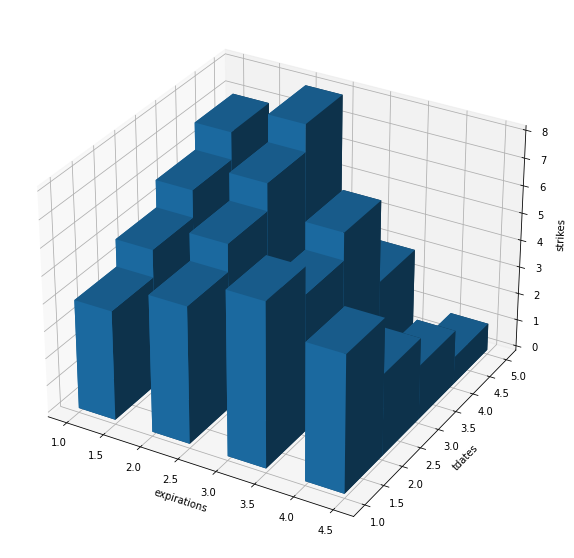

In [22]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')


# x = [0, 1, 2, 0, 1, 2, 0, 1, 2]
# y = [0, 0, 0, 1, 1, 1, 2, 2, 2]
# z = [0, 1, 2, 1, 2, 3, 2, 3, 1]
_exp = [1, 2, 3, 4] # expirations
_days = [1, 2, 3, 4] # days
strikes = np.array([
    # d1 d2 d3 d4
    4, 5, 6, 5, 
    5, 6, 5, 3, 
    6, 7, 6, 2, 
    7, 8, 3, 1, 
]) # strikes

exps, dayss = np.meshgrid(_exp, _days)
x, y = exps.ravel(), dayss.ravel()

# X gets traversed FIRST
# Y - SECOND
# Z - THIRD
# x [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
# y [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
# z [4, 5, 6, 5, 5, 6, 5, 3, 6, 7, 6, 2, 7, 8, 3, 1]
z = strikes

# _ = my_bar3d_plotter(x, y, z, labels=['expirations', 'tdates', 'strikes'])
_ = plotter(x, y, z, width=.5, labels=['expirations', 'tdates', 'strikes'])